# ClinVar ascertainment plots

In [1]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [2]:
regions = ["nmd_target", "distal_nmd", "start_proximal", "long_exon"]
region_order = ["nmd_target", "long_exon", "distal_nmd", "start_proximal"]
region_labels = ["NMD target", "Long exon", "Distal", "Start proximal"]


def categorise_regions(df):
    df["region"] = pd.Categorical(df["region"], categories=region_order, ordered=True)
    df = df.sort_values("region")
    return df

In [3]:
def plot_clinvar_bars(df, ax, height, ylabel, bar_label=True, axhline=False):

    n = len(df)
    x = np.arange(n)
    h = df[height]

    b = ax.bar(
        x=x / n,
        height=h,
        width=1 / (n + 1),
    )
    if bar_label:
        ax.bar_label(b, fmt="%.2f")

    ax.set_xticks(
        ticks=x / n,
        labels=region_labels,
        rotation=90,
        ha="center",
    )
    ax.tick_params(axis="x", length=0)

    ax.set_ylabel(ylabel)
    
    if axhline:
        ax.axhline(y=axhline, linestyle="--", color=C.grey)

    return None

## CDS footprints of NMD regions

In [4]:
footprint = pd.read_csv("../outputs/stats_nmd_footprint.tsv", sep="\t").pipe(categorise_regions)

footprint

,region,footprint
0,nmd_target,0.613358
3,long_exon,0.079188
1,distal_nmd,0.219985
2,start_proximal,0.087468


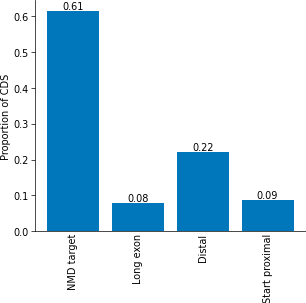

In [5]:
fig, ax = plt.subplots()
plot_clinvar_bars(footprint, ax, "footprint", "Proportion of CDS",)

## Ascertainment in ClinVar

In [6]:
asrtn = pd.read_csv("../outputs/stats_clinvar_ascertainment.tsv", sep="\t").pipe(
    categorise_regions
)
asrtn

,region,prop_norm
2,nmd_target,1.153902
1,long_exon,1.406573
0,distal_nmd,0.567295
3,start_proximal,0.640970


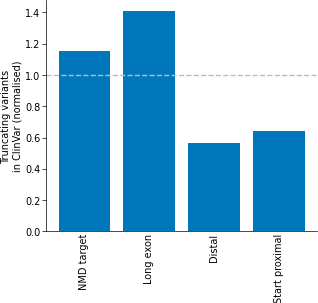

In [7]:
fig, ax = plt.subplots()
plot_clinvar_bars(
    asrtn, ax, "prop_norm", "Truncating variants\nin ClinVar (normalised)", bar_label=False, axhline=1
)

## Proportion of truncating variants in ClinVar which are VUS

In [8]:
clin_vus = (
    pd.read_csv("../outputs/stats_clinvar_acmg_by_region.tsv", sep="\t")
    .query("acmg == 'VUS'")
    .pipe(categorise_regions)
)
clin_vus

,region,acmg,proportion
7,nmd_target,VUS,0.087468
4,long_exon,VUS,0.054210
1,distal_nmd,VUS,0.310823
10,start_proximal,VUS,0.123434


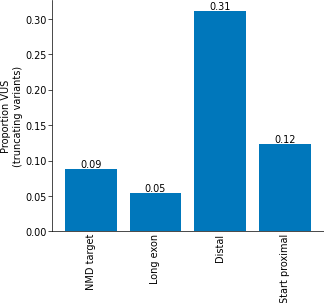

In [9]:
fig, ax = plt.subplots()
plot_clinvar_bars(clin_vus, ax, "proportion","Proportion VUS\n(truncating variants)",)